In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
import glob

In [2]:
Phil = pd.read_csv('Phil_with_idle_time_bike.csv', low_memory=False)
Weather = pd.read_csv('Philadelphia', low_memory=False)
Weather

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Philadelphia,2015-01-01 05:54:00,-2.0,33.0,Fair,1022.88,24.0,0.0,-8.0
1,Philadelphia,2015-01-01 06:54:00,-2.0,33.0,Fair,1022.20,24.0,0.0,-8.0
2,Philadelphia,2015-01-01 07:54:00,-2.0,33.0,Fair,1022.20,19.0,0.0,-7.0
3,Philadelphia,2015-01-01 08:54:00,-1.0,33.0,Fair,1021.87,22.0,0.0,-7.0
4,Philadelphia,2015-01-01 09:54:00,-1.0,33.0,Fair,1021.87,26.0,0.0,-8.0
...,...,...,...,...,...,...,...,...,...
90876,Philadelphia,2023-01-01 04:00:00,11.0,26.0,Cloudy,1007.55,9.0,0.0,11.0
90877,Philadelphia,2023-01-01 04:30:00,11.0,26.0,Cloudy,1009.24,15.0,0.0,11.0
90878,Philadelphia,2023-01-01 04:37:00,11.0,20.0,Fog,1008.90,20.0,0.0,11.0
90879,Philadelphia,2023-01-01 04:48:00,11.0,20.0,Fog,1008.57,11.0,0.0,11.0


In [3]:
Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90881 entries, 0 to 90880
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city                     90881 non-null  object 
 1   timestamp                90881 non-null  object 
 2   temperature              90872 non-null  float64
 3   cloud_cover              90878 non-null  float64
 4   cloud_cover_description  90878 non-null  object 
 5   pressure                 90867 non-null  float64
 6   windspeed                90829 non-null  float64
 7   precipitation            90881 non-null  float64
 8   felt_temperature         90861 non-null  float64
dtypes: float64(6), object(3)
memory usage: 6.2+ MB


In [4]:
Weather['timestamp'] = pd.to_datetime(Weather['timestamp'])

start_date = pd.to_datetime('2020-12-31 23:54:00')
end_date = pd.to_datetime('2023-01-01 00:54:00')
m = (Weather['timestamp'] >= start_date) & (Weather['timestamp'] <= end_date) & (Weather['timestamp'].dt.minute == 54)
Weather.drop(Weather.loc[~m].index, inplace=True)
Weather

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
69161,Philadelphia,2020-12-31 23:54:00,5.0,26.0,Cloudy,1026.85,19.0,0.00,1.0
69162,Philadelphia,2021-01-01 00:54:00,5.0,26.0,Cloudy,1027.19,11.0,0.00,2.0
69163,Philadelphia,2021-01-01 01:54:00,4.0,26.0,Cloudy,1028.20,19.0,0.00,0.0
69164,Philadelphia,2021-01-01 02:54:00,3.0,29.0,Partly Cloudy,1028.88,20.0,0.00,-2.0
69165,Philadelphia,2021-01-01 03:54:00,2.0,27.0,Mostly Cloudy,1029.90,17.0,0.00,-2.0
...,...,...,...,...,...,...,...,...,...
90852,Philadelphia,2022-12-31 20:54:00,12.0,20.0,Fog,1011.95,0.0,0.00,12.0
90856,Philadelphia,2022-12-31 21:54:00,11.0,20.0,Fog,1011.61,0.0,0.00,11.0
90859,Philadelphia,2022-12-31 22:54:00,12.0,11.0,Light Rain,1010.94,6.0,0.25,12.0
90863,Philadelphia,2022-12-31 23:54:00,11.0,12.0,Rain,1010.94,11.0,1.27,11.0


In [5]:
Weather[Weather["city"].isnull()==True]
Weather[Weather["timestamp"].isnull()==True]
Weather[Weather["temperature"].isnull()==True]
Weather[Weather["cloud_cover"].isnull()==True]
Weather[Weather["cloud_cover_description"].isnull()==True]
Weather[Weather["pressure"].isnull()==True]
Weather[Weather["windspeed"].isnull()==True]
Weather[Weather["precipitation"].isnull()==True]
Weather[Weather["felt_temperature"].isnull()==True]

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
80747,Philadelphia,2022-01-28 04:54:00,-1.0,26.0,Cloudy,1023.80,NaN,0.00,NaN
80814,Philadelphia,2022-01-29 15:54:00,-7.0,14.0,Light Snow,1008.57,NaN,0.00,NaN
80837,Philadelphia,2022-01-30 09:54:00,NaN,33.0,Fair,1016.01,15.0,0.00,NaN
80873,Philadelphia,2022-01-31 20:54:00,2.0,30.0,Partly Cloudy,1026.85,NaN,0.00,NaN
81649,Philadelphia,2022-02-25 14:54:00,3.0,11.0,Light Rain,1016.35,NaN,2.54,NaN
83028,Philadelphia,2022-04-10 21:54:00,NaN,28.0,Mostly Cloudy,1011.95,NaN,0.00,NaN


In [6]:
Weather['temperature'] = Weather['temperature'].interpolate(method='linear')
Weather['cloud_cover'] = Weather['cloud_cover'].interpolate(method='linear')
Weather['cloud_cover_description'] = Weather['cloud_cover_description'].interpolate(method='linear')
Weather['pressure'] = Weather['pressure'].interpolate(method='linear')
Weather['windspeed'] = Weather['windspeed'].interpolate(method='linear')
Weather['felt_temperature'] = Weather['felt_temperature'].interpolate(method='linear')

In [7]:
Weather[Weather["city"].isnull()==True]
Weather[Weather["timestamp"].isnull()==True]
Weather[Weather["temperature"].isnull()==True]
Weather[Weather["cloud_cover"].isnull()==True]
Weather[Weather["cloud_cover_description"].isnull()==True]
Weather[Weather["pressure"].isnull()==True]
Weather[Weather["windspeed"].isnull()==True]
Weather[Weather["precipitation"].isnull()==True]
Weather[Weather["felt_temperature"].isnull()==True]

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature


In [8]:
Weather.drop('city', axis=1, inplace=True)
Weather.reset_index(drop=True, inplace=True)
Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17460 entries, 0 to 17459
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                17460 non-null  datetime64[ns]
 1   temperature              17460 non-null  float64       
 2   cloud_cover              17460 non-null  float64       
 3   cloud_cover_description  17459 non-null  object        
 4   pressure                 17460 non-null  float64       
 5   windspeed                17460 non-null  float64       
 6   precipitation            17460 non-null  float64       
 7   felt_temperature         17460 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.1+ MB


In [9]:
Weather[Weather["cloud_cover_description"].isnull()==True]

,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
3844,2021-06-11 03:54:00,20.0,26.0,NaN,1016.69,17.0,0.0,20.0


In [10]:
hoursBefore = pd.to_datetime('2022-06-11 01:54:00')
hourBefore = pd.to_datetime('2022-06-11 02:54:00')
hourAfter = pd.to_datetime('2022-06-11 04:54:00')
hoursAfter = pd.to_datetime('2022-06-11 05:54:00')
m = (Weather['timestamp'] == hoursBefore) | (Weather['timestamp'] == hourBefore) | (Weather['timestamp'] == hourAfter) | (Weather['timestamp'] == hoursAfter)
f = Weather[m]
f

,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
12571,2022-06-11 01:54:00,26.0,27.0,Mostly Cloudy,1012.29,6.0,0.0,26.0
12572,2022-06-11 02:54:00,23.0,27.0,Mostly Cloudy,1012.97,13.0,0.0,23.0
12574,2022-06-11 04:54:00,22.0,27.0,Mostly Cloudy,1012.63,7.0,0.0,22.0
12575,2022-06-11 05:54:00,22.0,27.0,Mostly Cloudy,1012.63,9.0,0.0,22.0


In [11]:
Weather['cloud_cover_description'].fillna(method='ffill', inplace=True)
Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17460 entries, 0 to 17459
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                17460 non-null  datetime64[ns]
 1   temperature              17460 non-null  float64       
 2   cloud_cover              17460 non-null  float64       
 3   cloud_cover_description  17460 non-null  object        
 4   pressure                 17460 non-null  float64       
 5   windspeed                17460 non-null  float64       
 6   precipitation            17460 non-null  float64       
 7   felt_temperature         17460 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.1+ MB


In [12]:
Weather.to_csv('cleaned_Weather.csv', index=False)

In [13]:
Phil['start_time'] = pd.to_datetime(Phil['start_time'])
Phil.sort_values('start_time', inplace=True)
Weather.sort_values('timestamp', inplace=True)

In [14]:
df_merged = pd.merge_asof(Phil, Weather, left_on='start_time', right_on='timestamp', direction='nearest')
df_merged.drop('timestamp', axis=1, inplace=True)

In [15]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678842 entries, 0 to 1678841
Data columns (total 27 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   trip_id                  1678842 non-null  int64         
 1   duration                 1678842 non-null  int64         
 2   start_time               1678842 non-null  datetime64[ns]
 3   end_time                 1678842 non-null  object        
 4   start_station            1678842 non-null  int64         
 5   end_station              1678842 non-null  int64         
 6   bike_id                  1678842 non-null  object        
 7   plan_duration            1678842 non-null  int64         
 8   trip_route_category      1678842 non-null  object        
 9   passholder_type          1678842 non-null  object        
 10  bike_type                1678842 non-null  object        
 11  Date_s                   1678842 non-null  object        
 12  

In [16]:
df_merged['idle_time'] = pd.to_timedelta(df_merged['idle_time'])
df_merged['idle_time_minutes'] = df_merged['idle_time'].dt.total_seconds() / 60

In [17]:
df_merged

,trip_id,duration,start_time,end_time,start_station,end_station,bike_id,plan_duration,trip_route_category,passholder_type,...,end_coordinates,idle_time,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature,idle_time_minutes
0,365184634,15,2021-01-01 00:05:00,2021-01-01 00:20:00,3125,3157,14542,30,One Way,Indego30,...,"39.925449,-75.159538",1 days 17:43:00,5.0,26.0,Cloudy,1026.85,19.0,0.00,1.0,2503.000000
1,365184633,14,2021-01-01 00:06:00,2021-01-01 00:20:00,3022,3010,5294,30,One Way,Indego30,...,"39.947109,-75.166183",0 days 06:33:00,5.0,26.0,Cloudy,1026.85,19.0,0.00,1.0,393.000000
2,365184632,33,2021-01-01 00:07:00,2021-01-01 00:40:00,3066,3201,14586,30,One Way,Indego30,...,"39.955231,-75.166199",0 days 00:01:00,5.0,26.0,Cloudy,1026.85,19.0,0.00,1.0,1.000000
3,365184631,9,2021-01-01 00:13:00,2021-01-01 00:22:00,3045,3034,14683,30,One Way,Indego30,...,"39.933151,-75.162483",3 days 08:03:00,5.0,26.0,Cloudy,1026.85,19.0,0.00,1.0,4803.000000
4,365184630,13,2021-01-01 00:37:00,2021-01-01 00:50:00,3052,3040,3330,30,One Way,Indego30,...,"39.962891,-75.166061",1 days 12:06:00,5.0,26.0,Cloudy,1027.19,11.0,0.00,2.0,2166.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678837,579499101,23,2022-12-31 23:44:00,2023-01-01 00:07:00,3244,3287,14674,30,One Way,Indego30,...,"39.943668,-75.216057",0 days 10:59:22,11.0,12.0,Rain,1010.94,11.0,1.27,11.0,659.366667
1678838,579499099,17,2022-12-31 23:45:00,2023-01-01 00:02:00,3295,3054,23113,30,One Way,Indego30,...,"39.962502,-75.174202",0 days 16:01:45,11.0,12.0,Rain,1010.94,11.0,1.27,11.0,961.750000
1678839,579499097,8,2022-12-31 23:51:00,2022-12-31 23:59:00,3255,3046,16897,30,One Way,Indego30,...,"39.950119,-75.144722",0 days 09:42:07,11.0,12.0,Rain,1010.94,11.0,1.27,11.0,582.116667
1678840,579499095,23,2022-12-31 23:54:00,2023-01-01 00:16:00,3255,3113,22646,30,One Way,Indego30,...,"39.97472,-75.197807",0 days 09:50:10,11.0,12.0,Rain,1010.94,11.0,1.27,11.0,590.166667


**Correlation between the weather features**

<Axes: >

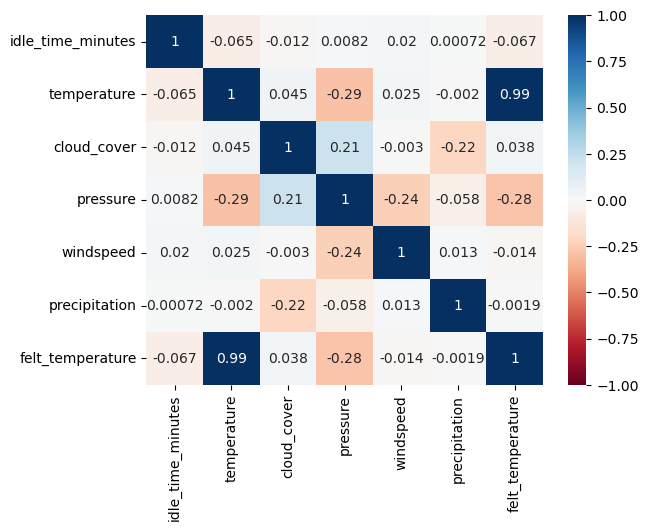

In [18]:
features = df_merged[['idle_time_minutes','temperature', 'cloud_cover', 'pressure', 'windspeed', 'precipitation','felt_temperature']]
corr = features.corr()
# Create the heatmap
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)

**Idle time and weather**

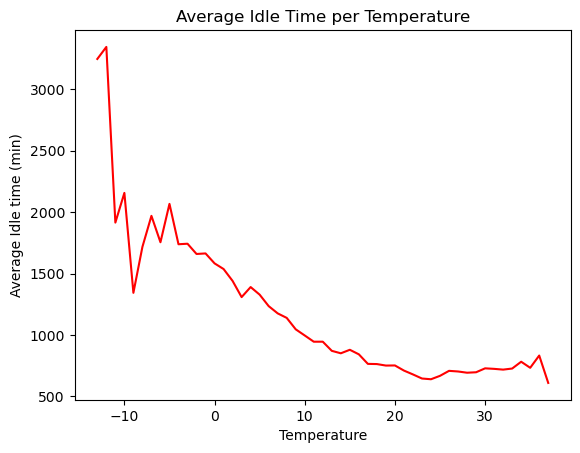

<Figure size 1600x900 with 0 Axes>

In [19]:
avg_perTemp = df_merged.groupby(df_merged['temperature'])['idle_time_minutes'].mean()

plt.xlabel("Temperature")
plt.ylabel("Average Idle time (min)")
plt.title("Average Idle Time per Temperature")
plt.plot(avg_perTemp.index,avg_perTemp.values, color = "red") 
plt.figure(figsize = (16,9))
plt.show()

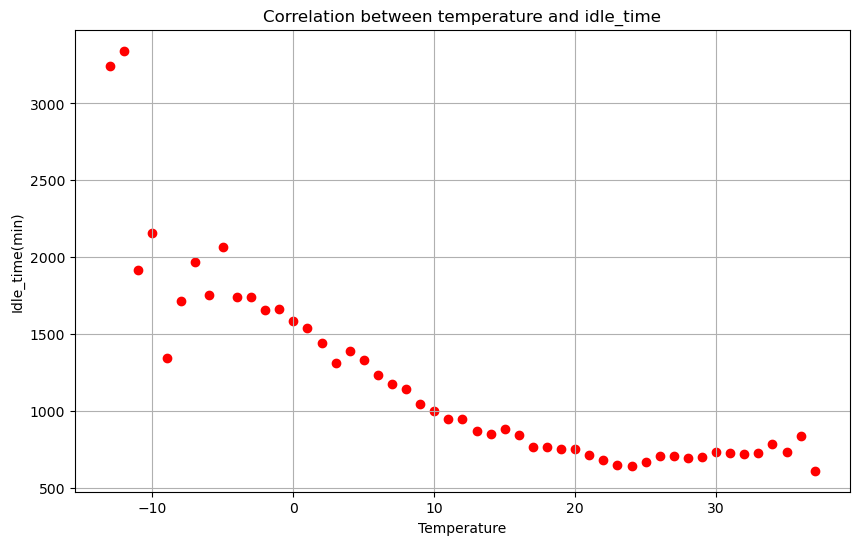

In [20]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))
ax.scatter(avg_perTemp.index,avg_perTemp.values,color='red', marker='o')
ax.set_xlabel("Temperature")
ax.set_ylabel("Idle_time(min)")
ax.set_title("Correlation between temperature and idle_time")
plt.grid(True)
plt.show()

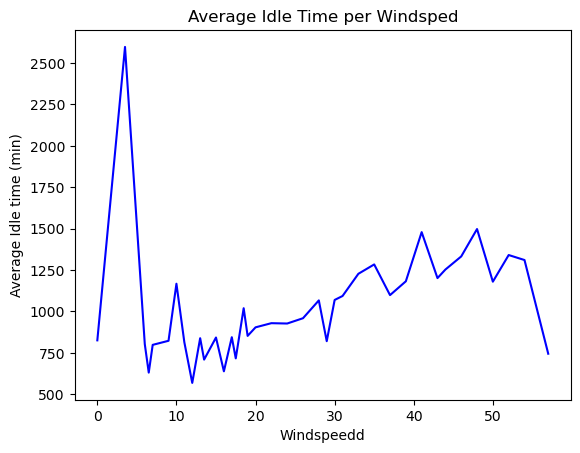

<Figure size 1600x900 with 0 Axes>

In [21]:
avg_perWindspeed = df_merged.groupby(df_merged['windspeed'])['idle_time_minutes'].mean()

plt.xlabel("Windspeedd")
plt.ylabel("Average Idle time (min)")
plt.title("Average Idle Time per Windsped")
plt.plot(avg_perWindspeed.index,avg_perWindspeed.values, color = "blue") 
plt.figure(figsize = (16,9))
plt.show()

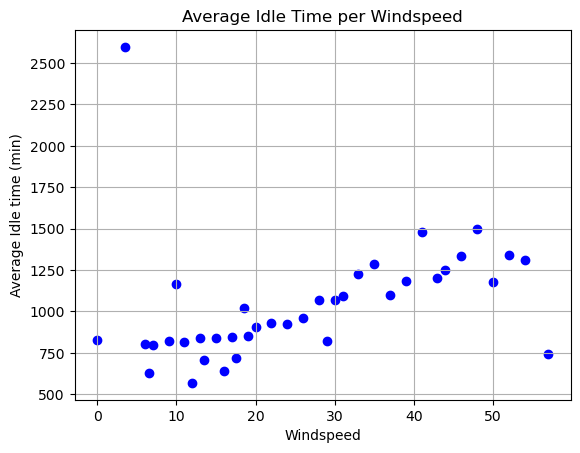

In [22]:
plt.xlabel("Windspeed")
plt.ylabel("Average Idle time (min)")
plt.title("Average Idle Time per Windspeed")

plt.scatter(avg_perWindspeed.index, avg_perWindspeed.values, color='blue', marker='o')
plt.grid()
plt.show()

In [23]:
cloud_cover_description = df_merged['cloud_cover_description'].unique()
print(cloud_cover_description)

['Cloudy' 'Partly Cloudy' 'Mostly Cloudy' 'Fair' 'Light Rain' 'Rain' 'Fog'
 'Mostly Cloudy / Windy' 'Light Drizzle' 'Haze' 'Cloudy / Windy'
 'Partly Cloudy / Windy' 'Light Snow' 'Fair / Windy' 'Wintry Mix / Windy'
 'Wintry Mix' 'Light Freezing Rain / Windy' 'Light Snow and Sleet / Windy'
 'Light Snow / Windy' 'Light Freezing Rain' 'Light Freezing Drizzle'
 'Snow' 'Light Snow and Sleet' 'Light Rain / Windy' 'Heavy Rain' 'Thunder'
 'T-Storm' 'Light Rain with Thunder' 'Heavy T-Storm' 'Rain / Windy'
 'Thunder in the Vicinity' 'Light Drizzle / Windy' 'Mist' 'Snow / Windy'
 'Drizzle' 'Heavy T-Storm / Windy' 'Heavy Rain / Windy' 'Patches of Fog']


In [24]:
bad_values = ['Light Rain', 'Rain', 'Light Drizzle', 'Haze', 'Light Snow', 
              'Light Freezing Rain / Windy', 'Light Snow and Sleet / Windy',
             'Light Snow / Windy', 'Light Freezing Rain', 'Light Freezing Drizzle',
             'Snow', 'Light Snow and Sleet', 'Light Rain / Windy', 'Heavy Rain', 'Thunder',
             'T-Storm', 'Light Rain with Thunder', 'Heavy T-Storm', 'Rain / Windy',
             'Thunder in the Vicinity', 'Light Drizzle / Windy', 'Mist', 'Snow / Windy',
             'Drizzle', 'Heavy T-Storm / Windy', 'Heavy Rain / Windy', 'Patches of Fog']
df_merged['bad_weather'] = (df_merged['cloud_cover_description'].isin(bad_values)).astype(int)

In [25]:
df_merged[df_merged['bad_weather'] == 1]['idle_time'].mean()

Timedelta('0 days 16:45:09.762992436')

In [26]:
df_merged[df_merged['bad_weather'] == 0]['idle_time'].mean()

Timedelta('0 days 14:16:49.257410393')

In [27]:
df_merged[(df_merged['temperature']>20) & (df_merged['bad_weather'] == 0)]['idle_time'].mean()

Timedelta('0 days 11:29:23.451601132')

In [28]:
df_merged[(df_merged['temperature']<20) & (df_merged['bad_weather'] == 1)]['idle_time'].mean()

Timedelta('0 days 19:19:36.957459959')

In [29]:
df_merged[ (df_merged['windspeed'] > 0) & (df_merged['bad_weather'] == 1) ]

,trip_id,duration,start_time,end_time,start_station,end_station,bike_id,plan_duration,trip_route_category,passholder_type,...,idle_time,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature,idle_time_minutes,bad_weather
320,365207231,3,2021-01-01 18:25:00,2021-01-01 18:28:00,3054,3014,14552,30,One Way,Indego30,...,0 days 16:54:00,3.0,11.0,Light Rain,1028.20,15.0,1.02,-1.0,1014.000000,1
321,365207230,28,2021-01-01 18:27:00,2021-01-01 18:55:00,3108,3066,14504,30,One Way,Indego30,...,0 days 19:34:00,3.0,11.0,Light Rain,1028.20,15.0,1.02,-1.0,1174.000000,1
322,365239948,77,2021-01-01 18:29:00,2021-01-01 19:46:00,3168,3078,11784,365,One Way,Indego365,...,0 days 00:04:00,3.0,11.0,Light Rain,1028.20,15.0,1.02,-1.0,4.000000,1
323,365239949,48,2021-01-01 18:29:00,2021-01-01 19:17:00,3058,3007,11712,30,One Way,Indego30,...,0 days 17:56:00,3.0,11.0,Light Rain,1028.20,15.0,1.02,-1.0,1076.000000,1
324,365239947,46,2021-01-01 18:35:00,2021-01-01 19:21:00,3200,3200,17081,30,Round Trip,Indego30,...,1 days 19:28:00,3.0,11.0,Light Rain,1028.20,15.0,1.02,-1.0,2608.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678837,579499101,23,2022-12-31 23:44:00,2023-01-01 00:07:00,3244,3287,14674,30,One Way,Indego30,...,0 days 10:59:22,11.0,12.0,Rain,1010.94,11.0,1.27,11.0,659.366667,1
1678838,579499099,17,2022-12-31 23:45:00,2023-01-01 00:02:00,3295,3054,23113,30,One Way,Indego30,...,0 days 16:01:45,11.0,12.0,Rain,1010.94,11.0,1.27,11.0,961.750000,1
1678839,579499097,8,2022-12-31 23:51:00,2022-12-31 23:59:00,3255,3046,16897,30,One Way,Indego30,...,0 days 09:42:07,11.0,12.0,Rain,1010.94,11.0,1.27,11.0,582.116667,1
1678840,579499095,23,2022-12-31 23:54:00,2023-01-01 00:16:00,3255,3113,22646,30,One Way,Indego30,...,0 days 09:50:10,11.0,12.0,Rain,1010.94,11.0,1.27,11.0,590.166667,1


In [30]:
df_merged[df_merged['bad_weather'] == 1].count()

trip_id                    86204
duration                   86204
start_time                 86204
end_time                   86204
start_station              86204
end_station                86204
bike_id                    86204
plan_duration              86204
trip_route_category        86204
passholder_type            86204
bike_type                  86204
Date_s                     86204
Weekday_s                  86204
Hour_s                     86204
Date_e                     86204
Weekday_e                  86204
Hour_e                     86204
start_coordinates          86204
end_coordinates            86204
idle_time                  86204
temperature                86204
cloud_cover                86204
cloud_cover_description    86204
pressure                   86204
windspeed                  86204
precipitation              86204
felt_temperature           86204
idle_time_minutes          86204
bad_weather                86204
dtype: int64

In [31]:
df_merged.groupby("bad_weather")["idle_time_minutes"].mean()

bad_weather
0     856.820957
1    1005.162717
Name: idle_time_minutes, dtype: float64

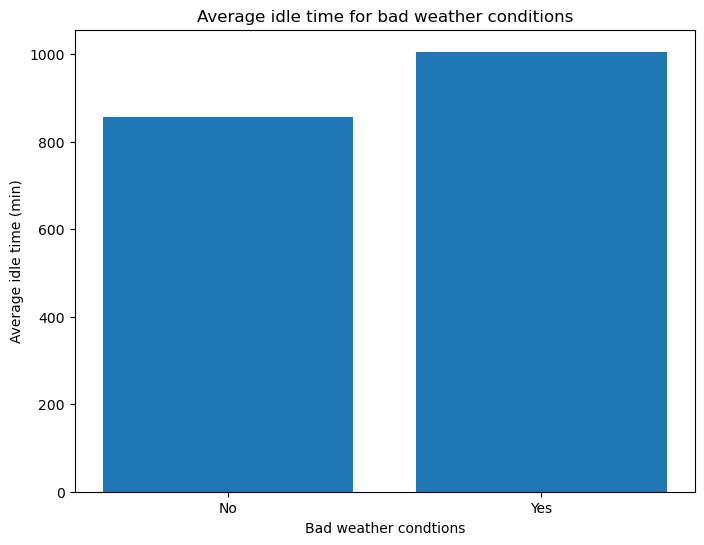

In [32]:
average_idle_time = df_merged.groupby("bad_weather")["idle_time_minutes"].mean()

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(average_idle_time.index, average_idle_time)

ax.set_xticks([0,1])
ax.set_xticklabels(['No', 'Yes'])
ax.set_xlabel("Bad weather condtions")
ax.set_ylabel("Average idle time (min)")
ax.set_title("Average idle time for bad weather conditions")

plt.show()

In [33]:
df_merged.groupby([(df_merged['bad_weather'] == 1) & (df_merged['temperature'] < 20)])['idle_time_minutes'].mean()

False     854.438809
True     1159.615958
Name: idle_time_minutes, dtype: float64

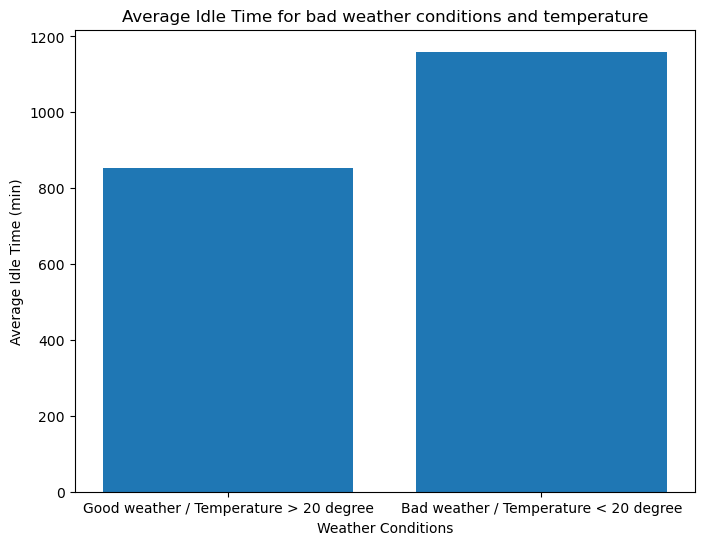

In [34]:
average_idle_time = df_merged.groupby([(df_merged['bad_weather'] == 1) & (df_merged['temperature'] < 20)])['idle_time_minutes'].mean()

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(average_idle_time.index, average_idle_time)

ax.set_xticks([0, 1])
ax.set_xticklabels(['Good weather / Temperature > 20 degree', 'Bad weather / Temperature < 20 degree'])
ax.set_xlabel("Weather Conditions")
ax.set_ylabel("Average Idle Time (min)")
ax.set_title("Average Idle Time for bad weather conditions and temperature")

plt.show()

In [35]:
df_merged.groupby([(df_merged['windspeed'] > 0) & df_merged['bad_weather'] == 1])['idle_time_minutes'].mean()

False    857.870572
True     994.775791
Name: idle_time_minutes, dtype: float64

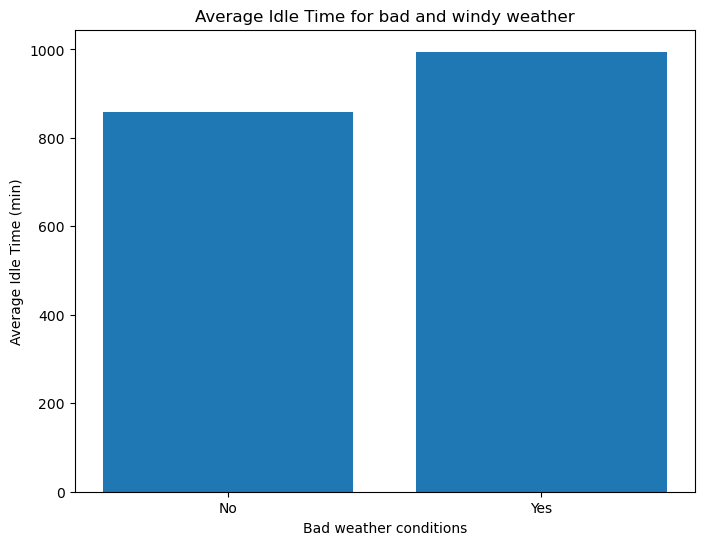

In [36]:
average_idle_time = df_merged.groupby([(df_merged['windspeed'] > 0) & df_merged['bad_weather'] == 1])['idle_time_minutes'].mean()

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(average_idle_time.index, average_idle_time)

ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])
ax.set_xlabel("Bad weather conditions")
ax.set_ylabel("Average Idle Time (min)")
ax.set_title("Average Idle Time for bad and windy weather")

plt.show()

In [37]:
dropCol = ['cloud_cover', 'cloud_cover_description', 'pressure', 'precipitation', 'felt_temperature']
df_merged.drop(dropCol, axis=1, inplace=True)
df_merged

,trip_id,duration,start_time,end_time,start_station,end_station,bike_id,plan_duration,trip_route_category,passholder_type,...,Date_e,Weekday_e,Hour_e,start_coordinates,end_coordinates,idle_time,temperature,windspeed,idle_time_minutes,bad_weather
0,365184634,15,2021-01-01 00:05:00,2021-01-01 00:20:00,3125,3157,14542,30,One Way,Indego30,...,2021-01-01,4,0,"39.943909,-75.167351","39.925449,-75.159538",1 days 17:43:00,5.0,19.0,2503.000000,0
1,365184633,14,2021-01-01 00:06:00,2021-01-01 00:20:00,3022,3010,5294,30,One Way,Indego30,...,2021-01-01,4,0,"39.95472,-75.183228","39.947109,-75.166183",0 days 06:33:00,5.0,19.0,393.000000,0
2,365184632,33,2021-01-01 00:07:00,2021-01-01 00:40:00,3066,3201,14586,30,One Way,Indego30,...,2021-01-01,4,0,"39.94561,-75.173477","39.955231,-75.166199",0 days 00:01:00,5.0,19.0,1.000000,0
3,365184631,9,2021-01-01 00:13:00,2021-01-01 00:22:00,3045,3034,14683,30,One Way,Indego30,...,2021-01-01,4,0,"39.947922,-75.162369","39.933151,-75.162483",3 days 08:03:00,5.0,19.0,4803.000000,0
4,365184630,13,2021-01-01 00:37:00,2021-01-01 00:50:00,3052,3040,3330,30,One Way,Indego30,...,2021-01-01,4,0,"39.947319,-75.156952","39.962891,-75.166061",1 days 12:06:00,5.0,11.0,2166.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678837,579499101,23,2022-12-31 23:44:00,2023-01-01 00:07:00,3244,3287,14674,30,One Way,Indego30,...,2023-01-01,6,0,"39.938648,-75.16674","39.943668,-75.216057",0 days 10:59:22,11.0,11.0,659.366667,1
1678838,579499099,17,2022-12-31 23:45:00,2023-01-01 00:02:00,3295,3054,23113,30,One Way,Indego30,...,2023-01-01,6,0,"39.950279,-75.160271","39.962502,-75.174202",0 days 16:01:45,11.0,11.0,961.750000,1
1678839,579499097,8,2022-12-31 23:51:00,2022-12-31 23:59:00,3255,3046,16897,30,One Way,Indego30,...,2022-12-31,5,23,"39.950951,-75.164383","39.950119,-75.144722",0 days 09:42:07,11.0,11.0,582.116667,1
1678840,579499095,23,2022-12-31 23:54:00,2023-01-01 00:16:00,3255,3113,22646,30,One Way,Indego30,...,2023-01-01,6,0,"39.950951,-75.164383","39.97472,-75.197807",0 days 09:50:10,11.0,11.0,590.166667,1


In [38]:
df_merged.to_csv('merged_PhilWeather.csv', index=False)